<a href="https://colab.research.google.com/github/JLee823/2023-1st-AI-assisted-drug-discovery-SNU/blob/main/AI_based_drug_discvoery_week2_Molecular_descriptors_fingerprints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RDKit 기초
-----
RDKit은 분자의 물성을 계산하고 분자를 파이썬을 이용해서 변형할 수 있는 파이썬 기반의 cheminformatics library이다. 

small molecule을 기반으로 하는 데이터 처리에는 필수적인 라이브러리라고 할 수 있다. 

RDKit은 간단히 pip 명령어를 이용해서 설치할 수 있다. 

기본적인 RDKit tutorial은 아래 사이트에서 찾을 수 있다.

https://www.rdkit.org/docs/GettingStartedInPython.html

In [1]:
pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## RDKit 을 이용해서 분자 읽어들이기. 
-------

In [2]:
import rdkit
import rdkit.Chem as Chem
from rdkit.Chem.Draw import IPythonConsole # Jupyter notebook에 분자가 바로 표현되게 하려면 이 줄이 필요하다. 

### 1. 여러개의 분자가 들어있는 sdf 파일 포맷읽기
----
**sdmolsupplier**함수는 SDF 파일 포맷 (Mol 포맷)으로 되어 있는 여러개의 분자를 읽는다. 

In [3]:
suppl = Chem.SDMolSupplier("drugs.sdf") # sdmolsupplier 는 SDF 파일 포맷 (Mol 포맷)으로 되어 있는 여러개의 분자를 읽는다. 

In [4]:
type(suppl)

rdkit.Chem.rdmolfiles.SDMolSupplier

sdf 파일 안에 있는 첫번째 분자의 구조식을 확인해보자!

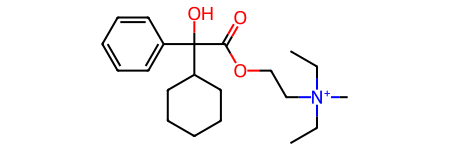

In [5]:
suppl[0]

supplier 안에 몇 개의 분자가 존재하는지 확인해보자. 

In [6]:
len(suppl) #

725

101번째 분자의 구조

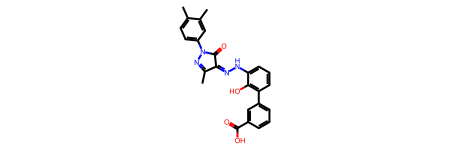

In [7]:
suppl[100]

### 예시 1: 분자를 구성하는 heavy atom의 개수 세기.

In [8]:
for mol in suppl:
    # mol은 분자 정보가 들어가있는 mol class이다. 
    print(mol.GetNumAtoms()) # GetNumAtoms는 mol class의 method이다. 

25
11
13
19
36
10
13
16
21
21
25
26
7
30
23
19
20
10
18
19
17
17
20
17
20
13
15
29
16
31
20
19
16
25
16
20
21
24
10
23
26
44
25
21
9
17
24
16
21
19
21
19
26
18
30
12
23
12
11
14
20
32
16
17
23
13
28
19
26
12
35
20
28
39
13
14
20
25
27
21
23
30
19
16
36
13
13
18
28
24
12
32
34
31
20
17
33
18
20
22
33
24
27
199
28
12
25
22
40
10
34
28
22
30
30
22
10
30
26
14
20
21
24
20
22
27
19
41
18
24
28
43
14
32
29
16
19
29
30
10
36
19
34
22
27
34
31
22
37
35
18
16
33
46
13
18
24
22
21
28
26
22
31
39
19
25
19
32
27
22
15
51
15
20
26
12
9
4
34
22
14
34
31
31
17
35
36
45
24
19
25
39
32
27
29
32
26
21
22
17
23
50
17
41
22
32
33
23
12
11
28
23
17
45
32
21
19
28
25
19
33
35
26
15
30
28
10
15
11
19
16
22
54
22
15
9
15
40
21
13
32
20
21
16
26
18
37
26
19
17
35
31
11
28
31
23
22
65
14
22
32
40
19
22
26
23
22
13
10
28
15
36
21
12
17
46
18
14
22
13
21
27
10
24
27
36
23
22
29
23
16
25
31
16
29
23
32
22
18
24
19
14
20
28
35
65
22
23
14
21
17
27
25
29
30
23
41
37
19
15
29
51
18
19
16
39
31
30
20
14
29
51
27
29
22

### 예제 2: 원자의 개수가 30이상인 큰 분자들만 large_molecules 라는 리스트에 저장. 


In [9]:
large_molecules = [] 
for mol in suppl:
    num_atom = mol.GetNumAtoms()
    if num_atom >= 30:
        large_molecules.append(mol)
print(f"Number of large molecules: {len(large_molecules)}")

Number of large molecules: 181


**큰 분자들의 구조식을 확인해보자.**

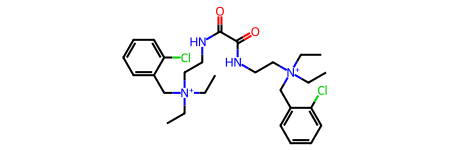

In [10]:
large_molecules[0]

### 예제 2-1: List comprehension을 이용해서 원하는 분자만 골라내기. 

In [11]:
# python에서는 list comprehension 을 제공. 
large_mol2 = [mol for mol in suppl if mol.GetNumAtoms() >=30]

큰 분자의 개수 출력

In [12]:
print(len(large_mol2))

181


In [13]:
type(mol)

rdkit.Chem.rdchem.Mol

이렇게 RDKit에서 분자를 읽어들여서 성공적으로 변환된면 rdkit.Chem.rdchem.Mol 타입의 변수로 저장되게 된다. 

RDKit의 Mol type 변수는 분자의 물성을 뽑아내거나 변형시킬 수 있는 다양한 method들이 이미 구현되어 있다.

### RDKit Mol 문서
-----
https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.Mol

## 분자를 SMILES로 부터 읽어들이기.
-------


In [14]:
m=Chem.MolFromSmiles('C[C@H](O)c1ccccc1')

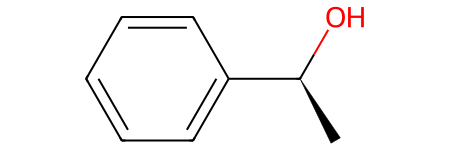

In [15]:
m

여기서 주의할 점은 SMILES로 부터 분자를 읽어들이면 일반적으로 **수소가 붙어있지 않다!**

## SMILES에서 chirality 표시하기.
* @ 는 반시계 방향.
* @@ 는 시계 방향.
* chirality는 필수는 아님. 

In [16]:
m2=Chem.MolFromSmiles('CC(O)c1ccccc1')

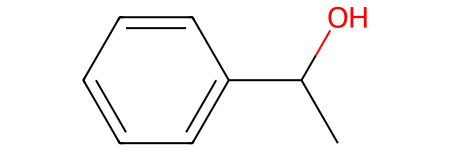

In [17]:
m2

In [18]:
Chem.MolToSmiles(m2)

'CC(O)c1ccccc1'

Aromatic 원자의 경우, 소문자로 표현하는 것이 기본이다. 

그러나 필요에 따라서 Kekule form으로 표현하도록 할 수 있다. 

In [19]:
Chem.MolToSmiles(m2, kekuleSmiles=True)

'CC(O)C1=CC=CC=C1'

In [20]:
m3 = Chem.MolFromSmiles('C1=CC=CN=C1')

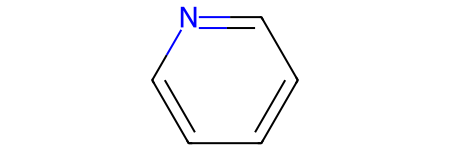

In [21]:
m3

In [22]:
Chem.MolToSmiles(m3)

'c1ccncc1'

In [23]:
Chem.Kekulize(m3) # aromatic bond가 single-double-single-double-... 이런식으로 표현되도록 한다. 

In [24]:
Chem.MolToSmiles(m3, kekuleSmiles=True)

'C1=CC=NC=C1'

## 여러개의 SMILES를 읽어서 mol-type 변수의 리스트로 저장하기
------
많은 경우 여러개의 SMILES들이 하나의 text 파일로 저장되어 있는 경우가 많다. 

이 경우, SMILES들을 순차적으로 읽어들여 리스트에 저장하는 예시를 살펴보자. 


In [25]:
mol_list = []
with open("drugs.smi") as fp:
  for line in fp:
    m = Chem.MolFromSmiles(line)
    mol_list.append(m)

In [26]:
len(mol_list)

725

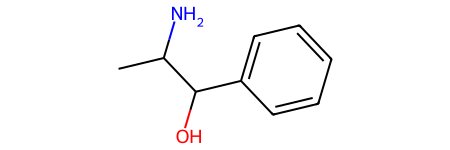

In [27]:
mol_list[1]

## RDKit에서 분자를 여러가지 현태의 파일 포맷으로 출력/저장하기. 
-------


## SMILES로 출력하기. 

기본적으로 aromaticity는 소문자로 나타낸다. 

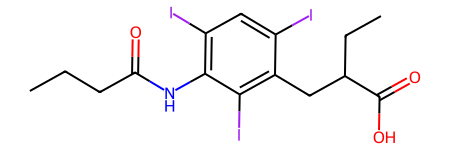

In [28]:
m

In [29]:
Chem.MolToSmiles(m)

'CCCC(=O)Nc1c(I)cc(I)c(CC(CC)C(=O)O)c1I'

In [30]:
Chem.MolToSmiles(m2)

'CC(O)c1ccccc1'

In [31]:
Chem.MolToSmiles(m3)

'c1ccncc1'

### Kekulization
------
single-double-single-... 이런 형태로 SMILES가 출력하도록 함.

In [32]:
Chem.MolToSmiles(m, kekuleSmiles=True, canonical=True) # Canonical SMILES를 출력한다.

'CCCC(=O)NC1=C(I)C=C(I)C(CC(CC)C(=O)O)=C1I'

In [33]:
Chem.MolToSmiles(m3, kekuleSmiles=True)

'C1=CC=NC=C1'

In [34]:
Chem.MolToSmiles(m3, kekuleSmiles=False)

'c1ccncc1'

isomericSmilles = True 이면 chirality 정보를 출력한다. 

In [35]:
Chem.MolToSmiles(m, kekuleSmiles=True, isomericSmiles=True) 

'CCCC(=O)NC1=C(I)C=C(I)C(CC(CC)C(=O)O)=C1I'

isomericSmilles = False 이면 chiraity 정보 무시.  

In [36]:
Chem.MolToSmiles(m, kekuleSmiles=True, isomericSmiles=False) 

'CCCC(=O)NC1=C(I)C=C(I)C(CC(CC)C(=O)O)=C1I'

### MolToSmiles의 모든 옵션은 다음 주소에서 확인할 수 있다. 
https://www.rdkit.org/docs/source/rdkit.Chem.rdmolfiles.html#rdkit.Chem.rdmolfiles.MolToSmiles

## 2. 분자를 Mol format (SDF format)으로 출력하기.
------
Chem.MolToMolBlock 함수를 사용. 

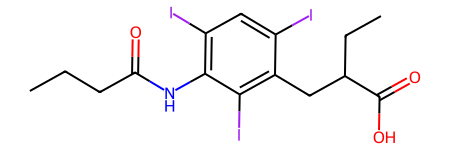

In [37]:
m

In [38]:
print(Chem.MolToMolBlock(m)) # rdkit mol instance를 Mol-format으로 출력. 


     RDKit          2D

 22 22  0  0  0  0  0  0  0  0999 V2000
    7.5000   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.0000   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.2500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000   -2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -2.5981    0.0000 I   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 I   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    2.5981    0

In [39]:
print(Chem.MolToMolBlock(m2)) # rdkit mol instance를 Mol-format으로 출력. 


     RDKit          2D

  9  9  0  0  0  0  0  0  0  0999 V2000
    3.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500    1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  2  4  1  0
  4  5  2  0
  5  6  1  0
  6  7  2  0
  7  8  1  0
  8  9  2  0
  9  4  1  0
M  END



In [40]:
print(Chem.MolToMolBlock(m3)) # rdkit mol instance를 Mol-format으로 출력. 


     RDKit          2D

  6  6  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
M  END



파일로 저장하기 위해서는 MolToMolFile 함수를 이용한다. 

https://www.rdkit.org/docs/source/rdkit.Chem.rdmolfiles.html#rdkit.Chem.rdmolfiles.MolToMolFile

아래 예시에서는 m3.mol 파일을 생성하고 분자의 정보를 mol format으로 저장한다. 

In [41]:
Chem.MolToMolFile(m3, "m3.mol")

## PDB 파일로 저장하기
------
PDB 포맷으로 저장하기 위해서는 [MolToPDBBlock](https://www.rdkit.org/docs/source/rdkit.Chem.rdmolfiles.html#rdkit.Chem.rdmolfiles.MolToPDBBlock)과 [MolToPDBFile](https://www.rdkit.org/docs/source/rdkit.Chem.rdmolfiles.html#rdkit.Chem.rdmolfiles.MolToPDBFile) 함수를 이용한다. 

In [42]:
print(Chem.MolToPDBBlock(m3))

HETATM    1  C1  UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM    2  C2  UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM    3  C3  UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM    4  C4  UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM    5  N1  UNL     1       0.000   0.000   0.000  1.00  0.00           N  
HETATM    6  C5  UNL     1       0.000   0.000   0.000  1.00  0.00           C  
CONECT    1    2    2    6
CONECT    2    3
CONECT    3    4    4
CONECT    4    5
CONECT    5    6    6
END



위 PDB 포맷에서는 모든 3차원의 좌표가 0.0 으로 되어 있다. 

이를 해결하기 위해서는 **분자의 3차원 구조 정보를 생성해 주어야 한다.**

In [43]:
from rdkit.Chem import AllChem # AllChem module 읽어들이기.
m3 = Chem.AddHs(m3) # 수소 붙이기
AllChem.EmbedMolecule(m3) # 분자의 3차원 구조 생성

0

In [44]:
print(Chem.MolToPDBBlock(m3))

HETATM    1  C1  UNL     1      -1.150   0.519  -0.040  1.00  0.00           C  
HETATM    2  C2  UNL     1       0.071   1.152  -0.024  1.00  0.00           C  
HETATM    3  C3  UNL     1       1.243   0.405   0.022  1.00  0.00           C  
HETATM    4  C4  UNL     1       1.116  -0.966   0.049  1.00  0.00           C  
HETATM    5  N1  UNL     1      -0.096  -1.559   0.032  1.00  0.00           N  
HETATM    6  C5  UNL     1      -1.248  -0.861  -0.012  1.00  0.00           C  
HETATM    7  H1  UNL     1      -2.083   1.098  -0.075  1.00  0.00           H  
HETATM    8  H2  UNL     1       0.108   2.221  -0.046  1.00  0.00           H  
HETATM    9  H3  UNL     1       2.225   0.872   0.036  1.00  0.00           H  
HETATM   10  H4  UNL     1       2.036  -1.550   0.084  1.00  0.00           H  
HETATM   11  H5  UNL     1      -2.222  -1.332  -0.025  1.00  0.00           H  
CONECT    1    2    2    6    7
CONECT    2    3    8
CONECT    3    4    4    9
CONECT    4    5   10
CONECT

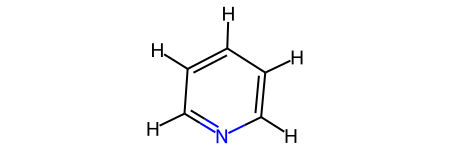

In [45]:
m3

In [46]:
Chem.MolToPDBFile(m3, "m3.pdb")

그 외, RDKit에서는 XYZ format, TPL format, CXSmiles (extended SMILES) 등을 추가로 지원한다!

**주의: RDKit에서는 mol2 파일 포맷은 정식으로 지원하지 않는다!**

Mol2 파일 생성을 위해서는 PDB나 Mol file을 외부 프로그램 (MarvinSketch, Avogadro 또는 openbabel)와 같은 프로그램을 이용해서 변환하는 것이 좋다. 

다만, atom type이 잘 못 되는 경우가 많으므로, 주의를 요함. 

In [47]:
print(Chem.MolToCXSmiles(m3))

[H]c1c([H])c([H])c([H])c([H])n1 |(2.03641,-1.55048,0.0842149;1.11592,-0.966382,0.0487181;1.24345,0.405439,0.021672;2.22491,0.871863,0.0355522;0.0708806,1.15199,-0.0236015;0.107598,2.22129,-0.0462237;-1.15029,0.519117,-0.0397213;-2.08253,1.09844,-0.0754037;-1.24801,-0.860577,-0.0117695;-2.22245,-1.33178,-0.0253786;-0.0958826,-1.55892,0.0319411),atomProp:0.isImplicit.1:3.isImplicit.1:5.isImplicit.1:7.isImplicit.1:9.isImplicit.1|


In [48]:
print(Chem.MolToTPLBlock(m3))

BioCAD format, all rights reserved
Output from RDKit
NAME Unnamed molecule
PROP 7 1
11 11
1 C 0 0.0 -115.029 51.9117 -3.97213 3 2 6 7 U
2 C 0 0.0 7.08806 115.199 -2.36015 3 1 3 8 U
3 C 0 0.0 124.345 40.5439 2.1672 3 2 4 9 U
4 C 0 0.0 111.592 -96.6382 4.87181 3 3 5 10 U
5 N 0 0.0 -9.58826 -155.892 3.19411 2 4 6 U
6 C 0 0.0 -124.801 -86.0577 -1.17695 3 5 1 11 U
7 H 0 0.0 -208.253 109.844 -7.54037 1 1 U
8 H 0 0.0 10.7598 222.129 -4.62237 1 2 U
9 H 0 0.0 222.491 87.1863 3.55522 1 3 U
10 H 0 0.0 203.641 -155.048 8.42149 1 4 U
11 H 0 0.0 -222.245 -133.178 -2.53786 1 6 U
1 1.5 1 2 0 0
2 1.5 2 3 0 0
3 1.5 3 4 0 0
4 1.5 4 5 0 0
5 1.5 5 6 0 0
6 1.5 6 1 0 0
7 1.0 1 7 0 0
8 1.0 2 8 0 0
9 1.0 3 9 0 0
10 1.0 4 10 0 0
11 1.0 6 11 0 0
CONFS 0



[04:50:16] Molecule has no name; arbitrary name assigned.


In [49]:
print(Chem.MolToXYZBlock(m3))

11

C     -1.150291    0.519117   -0.039721
C      0.070881    1.151994   -0.023601
C      1.243445    0.405439    0.021672
C      1.115921   -0.966382    0.048718
N     -0.095883   -1.558922    0.031941
C     -1.248005   -0.860577   -0.011770
H     -2.082535    1.098436   -0.075404
H      0.107598    2.221292   -0.046224
H      2.224910    0.871863    0.035552
H      2.036406   -1.550480    0.084215
H     -2.222448   -1.331780   -0.025379



## 수소 붙이기
-------
SMILES에서 분자를 읽어들이면 기본적으로 수소가 생략되어 있다. 

m3에 수소가 없으므로 수소를 붙여보자!

수소를 붙이는 함수는 Chem.AddHs(mol) 이다. 


In [50]:
m3_with_H = Chem.AddHs(m3) 

**새로운 변수를 리턴**한다는 점을 주의하자!

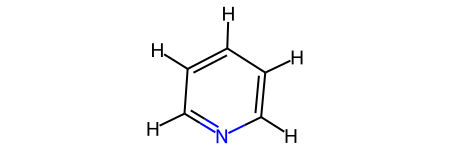

In [51]:
m3_with_H

In [52]:
print(Chem.MolToMolBlock(m3_with_H))


     RDKit          3D

 11 11  0  0  0  0  0  0  0  0999 V2000
   -1.1503    0.5191   -0.0397 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0709    1.1520   -0.0236 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2434    0.4054    0.0217 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1159   -0.9664    0.0487 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0959   -1.5589    0.0319 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2480   -0.8606   -0.0118 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0825    1.0984   -0.0754 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.1076    2.2213   -0.0462 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.2249    0.8719    0.0356 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.0364   -1.5505    0.0842 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.2224   -1.3318   -0.0254 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
  1  7  1  0
  2  8  1  0
  3  9  1  0
  4 10  1  0
  6 11  1  0
M  END



In [53]:
print(Chem.MolToMolBlock(m3))


     RDKit          3D

 11 11  0  0  0  0  0  0  0  0999 V2000
   -1.1503    0.5191   -0.0397 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0709    1.1520   -0.0236 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2434    0.4054    0.0217 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1159   -0.9664    0.0487 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0959   -1.5589    0.0319 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2480   -0.8606   -0.0118 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0825    1.0984   -0.0754 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.1076    2.2213   -0.0462 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.2249    0.8719    0.0356 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.0364   -1.5505    0.0842 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.2224   -1.3318   -0.0254 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
  1  7  1  0
  2  8  1  0
  3  9  1  0
  4 10  1  0
  6 11  1  0
M  END



In [54]:
m2_with_H = Chem.AddHs(m2)

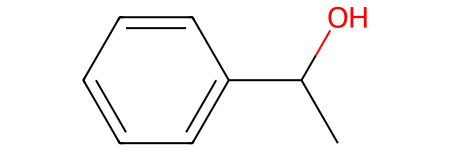

In [55]:
m2

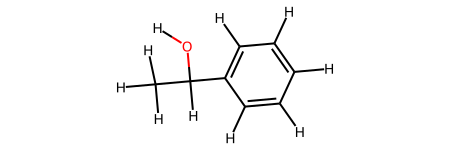

In [56]:
m2_with_H

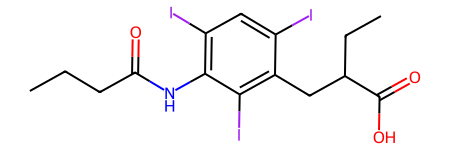

In [57]:
m

In [58]:
m_with_H = Chem.AddHs(m)

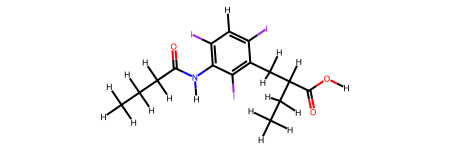

In [59]:
m_with_H

In [60]:
m4 = large_mol2[-1]

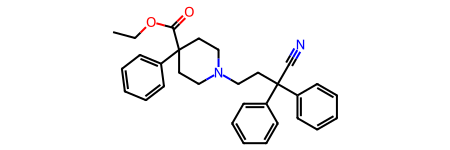

In [61]:
m4

In [62]:
m4_with_H = Chem.AddHs(m4)

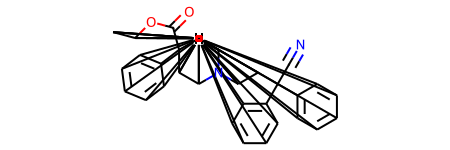

In [63]:
m4_with_H

In [64]:
print(Chem.MolToMolBlock(m4_with_H))


     RDKit          2D

 66 69  0  0  0  0  0  0  0  0999 V2000
   -3.7638    0.2765    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.7979    0.0176    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0908    0.7247    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1248    0.4659    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4177    1.1730    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8660   -0.5000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6594   -1.1088    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5833   -0.7261    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.3766   -1.3348    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.2461   -2.3263    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.3222   -2.7090    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5289   -2.1002    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8660   -1.5000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000   -2.0000    0

분자가 복잡할 경우, 수소의 좌표가 이상하게 붙는 경우들이 존재한다. 

이럴 경우, 수소의 좌표를 다시 계산해주어야 한다. 

AllChem.Compute2DCoords 함수를 사용하여야 한다. 

Chem과 AllChem의 차이점은 아래 문서를 참고. 


https://www.rdkit.org/docs/GettingStartedInPython.html#chem-vs-allchem 

In [65]:
from rdkit.Chem import AllChem # AllChem module 읽어들이기.

AllChem.Compute2DCoords(m4_with_H) # m4_with_H 그 자체에서 좌표가 계산되어서 저장되었음. 

0

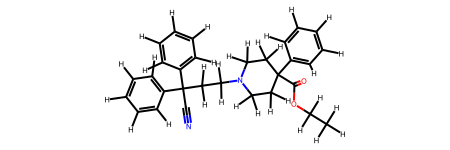

In [66]:
m4_with_H

In [67]:
print(Chem.MolToMolBlock(m4_with_H))


     RDKit          2D

 66 69  0  0  0  0  0  0  0  0999 V2000
    7.2087   -3.7193    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.9323   -2.9313    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.6560   -2.1433    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.7003   -0.6439    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.4430   -0.3543    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.4240    0.1441    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.4217    1.2642    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.8906    0.9602    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.8882    2.0803    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.4171    3.5044    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.9482    3.8084    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.9505    2.6883    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.4942    1.3212    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0099    1.1044    0

### 3차원 좌표에 관해
---------

**주의:** 모든 z 축이 0으로 설정되어 있다. 

기본적으로 그림으로 표현된 분자식 기반의 좌표를 저장하고 있기 때문에 2차원으로 표현되어 있음. 

3차원 구조를 얻어내기 위해서는 추가적인 계산이 필요함. 

하지만 분자가 커질수록 최소 에너지를 가지는 분자의 3차원 구조를 찾는 것이 쉽지 않다.

근사적으로 3^(Number of rotatable bonds) 개수만큼 3D 구조가 가능하다. 

그 중에서 에너지가 가장 낮은 것을 찾는 것은 쉽지 않다. 

그래서 rdkit에서는 약간의 가정과 근사를 써서 3D 구조를 만들어낸다. 

In [68]:
AllChem.EmbedMolecule(m4_with_H) # 분자 클래스 자체를 변형시킨다. 

0

분자 구조를 출력해보자. 

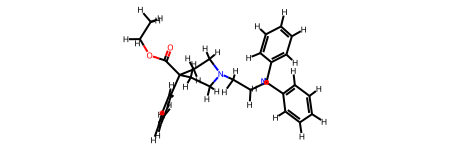

In [69]:
m4_with_H

## 3D 구조 표현에서 2D 구조로 바꾸기
--------


In [70]:
AllChem.Compute2DCoords(m4_with_H)

0

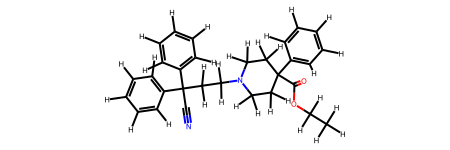

In [71]:
m4_with_H

## 수소 지우기
------
Chem.RemoveHs 함수를 사용.

In [72]:
m4_noH = Chem.RemoveHs(m4_with_H)

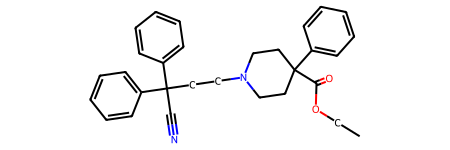

In [73]:
m4_noH

In [74]:
AllChem.Compute2DCoords(m4_noH)

0

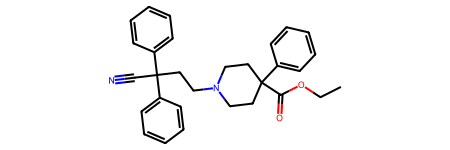

In [75]:
m4_noH